In [1]:
from PIL import Image
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
df = pd.read_csv('GrowLocations.csv')
df.head()

,Serial,Latitude,Longitude,Type,SensorType,Code,BeginTime,EndTime
0,PI040298AD5J215142,-7.923,54.98,Thingful.Connectors.GROWSensors.AirTemperature,Flower Power,Grow.Thingful.Sensors_5tjrqt1c,2018-10-17T13:14:07.000Z,2018-10-17T13:59:07.000Z
1,PI040298AD5J215142,-7.923,54.98,Thingful.Connectors.GROWSensors.BatteryLevel,Flower Power,Grow.Thingful.Sensors_5tjrqt1c,2018-10-17T13:14:07.000Z,2018-10-17T13:59:07.000Z
2,PI040298AD5J215142,-7.923,54.98,Thingful.Connectors.GROWSensors.FertilizerLevel,Flower Power,Grow.Thingful.Sensors_5tjrqt1c,2018-10-17T13:14:07.000Z,2018-10-17T13:59:07.000Z
3,PI040298AD5J215142,-7.923,54.98,Thingful.Connectors.GROWSensors.Light,Flower Power,Grow.Thingful.Sensors_5tjrqt1c,2018-10-17T13:14:07.000Z,2018-10-17T13:59:07.000Z
4,PI040298AD5J215142,-7.923,54.98,Thingful.Connectors.GROWSensors.SoilMoisture,Flower Power,Grow.Thingful.Sensors_5tjrqt1c,2018-10-17T13:14:07.000Z,2018-10-17T13:59:07.000Z


In [3]:
truncated_df = df[['Latitude', 'Longitude']]
truncated_df.head()

,Latitude,Longitude
0,-7.923,54.98
1,-7.923,54.98
2,-7.923,54.98
3,-7.923,54.98
4,-7.923,54.98


In [4]:
swapped = truncated_df.rename(columns={'Latitude':'Longitude', 'Longitude':'Latitude'})
# https://stackoverflow.com/a/25793732
swapped.head()


,Longitude,Latitude
0,-7.923,54.98
1,-7.923,54.98
2,-7.923,54.98
3,-7.923,54.98
4,-7.923,54.98


In [5]:
# check for nulls
swapped.isnull().sum().sum()

0

In [6]:
swapped.count()

Longitude    39294
Latitude     39294
dtype: int64

In [7]:
# check for values within range
filtered = swapped.query('Longitude > -10.592 and Longitude < 1.6848 and Latitude > 50.681 and Latitude < 57.985')

In [8]:
filtered.count()

Longitude    6438
Latitude     6438
dtype: int64

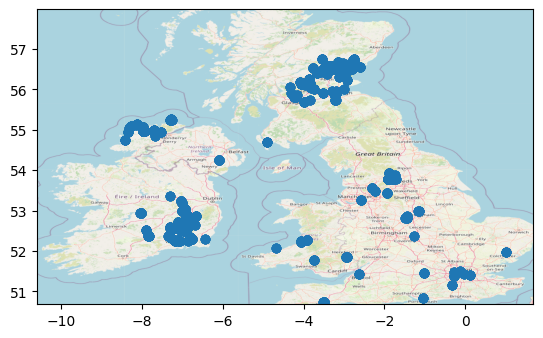

In [9]:
# Open the PNG file
img = Image.open('map7.png')

shift_factor = ((-10.592, 1.6848, 50.681, 57.985))
plt.axis(shift_factor)
# https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.axis.html

plt.imshow(img, extent=(shift_factor))
# https://matplotlib.org/stable/tutorials/images.html

plt.scatter(filtered['Longitude'],filtered['Latitude'])
